In [ ]:
# make plots to visualize data collected by ChorusWaves search script
# Date created: not sure sorry :(
# Last modified: 5/22/2024
# Author: Max Feinland for Blum Research Group

(1.0, 10.0)

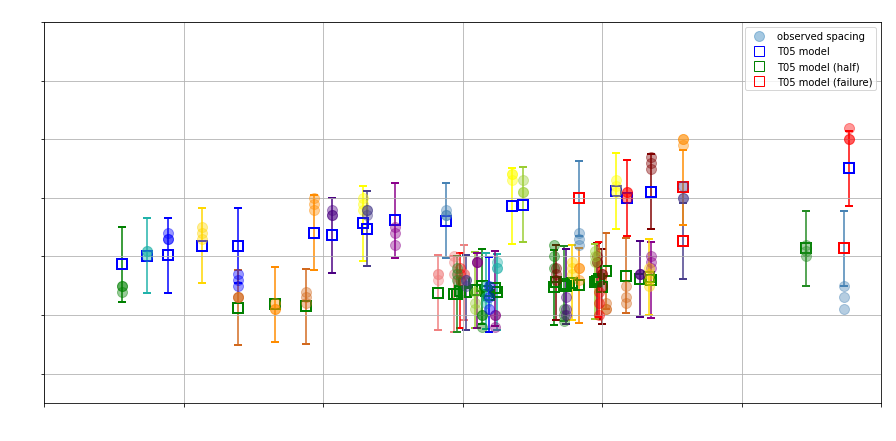

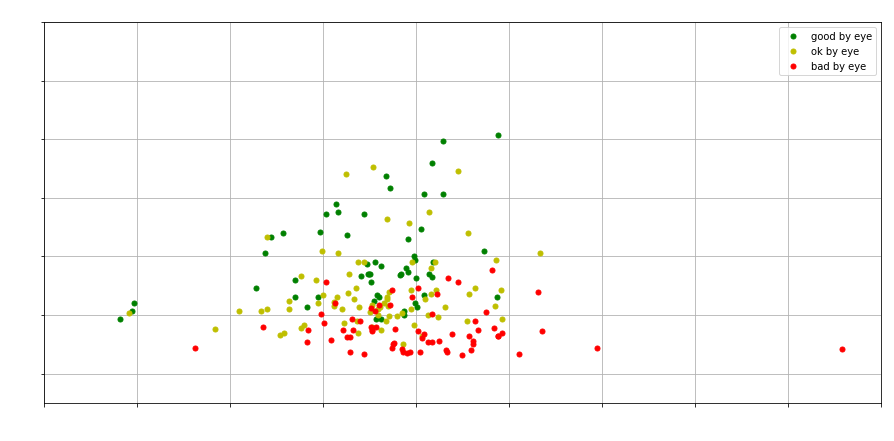

In [19]:
'''
Period vs. L-shell
'''

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast


plt.figure(figsize = (15, 7))
data = pd.read_csv("y2000thru2003.csv")
s = pd.read_csv("spacings.csv")
s['dt'] = s['dt'].apply(ast.literal_eval)

good_data = data[data.eye == 1]
good_data = good_data.reset_index(drop=True)
newper = [np.mean(x) for x in s.dt]

max_spread = 0.128645
fullper = np.zeros(len(good_data))


for j in range(len(good_data)):
    if (abs(newper[j] - good_data.tb[j]) <= max_spread) & \
    (abs(newper[j] - good_data.tb[j]/2) <= max_spread):
        # Both conditions are true, so figure out which is closer
        if abs(newper[j] - good_data.tb[j]) >= abs(newper[j] - good_data.tb[j])/2:
            fullper[j] = 1
        else:
            fullper[j] = 2
    elif abs(newper[j] - good_data.tb[j]) <= max_spread:
        fullper[j] = 1
    elif abs(newper[j] - good_data.tb[j]/2) <= max_spread:
        fullper[j] = 2
    else:
        fullper[j] = 0
        
# happy pride month!
colororder = ['lightcoral', 'maroon', 'red', 'chocolate', 'darkorange', 'gold', 'yellow',
              'yellowgreen', 'forestgreen', 'green', 'lightseagreen', 'blue', 'steelblue',
              'darkslateblue', 'indigo', 'purple', 'darkmagenta']
        
for k in range(len(s)):
    this_color = colororder[k%len(colororder)]
    # plot the spacings
    plt.plot(good_data.L[k]*np.ones(len(s.dt[k])), s.dt[k], 'o', alpha=0.4, markersize=10,
            color=this_color)
    
    # plot the predicted period
    if fullper[k]==1:
        edgecol = 'blue'
        tb = good_data.tb[k]
    elif fullper[k]==2:
        edgecol = 'green'
        tb = good_data.tb[k]/2
    else:
        edgecol = 'red'
        if abs(good_data.per[k] - good_data.tb[k]) < abs(good_data.per[k] - good_data.tb[k]/2):
            tb = good_data.tb[k]
        else:
            tb = good_data.tb[k]/2
        
    plt.errorbar(good_data.L[k], tb, yerr=max_spread, fmt='s', 
                 markerfacecolor='none', capsize=4, markeredgecolor=edgecol,
                 zorder=0, markersize=10, color=this_color, markeredgewidth=2)
        
plt.plot(0, 0, 'o', alpha=0.4, markersize=10, label='observed spacing')
plt.plot(0, 0, 'bs', markerfacecolor='none', markersize=10, label='T05 model')
plt.plot(0, 0, 'gs', markerfacecolor='none', markersize=10, label='T05 model (half)')
plt.plot(0, 0, 'rs', markerfacecolor='none', markersize=10, label='T05 model (failure)')


plt.legend()
plt.grid()
plt.title("Period vs. L-shell (\"good\" by eye)", color="white")
plt.xlabel("L-shell", color="white")
plt.ylabel("Period (s)", color="white")
plt.xticks(color='white')
plt.yticks(color='white')
plt.ylim(-.1, 1.2)
plt.xlim(3, 6)

plt.figure(figsize = (15, 7))
plt.plot(data.L[data.eye == 1], data.per[data.eye == 1], 'g.', label="good by eye",markersize=10)
plt.plot(data.L[data.eye == 2], data.per[data.eye == 2], 'y.', label="ok by eye",markersize=10)
plt.plot(data.L[data.eye == 0], data.per[data.eye == 0], 'r.', label="bad by eye",markersize=10)
plt.title("good by eye", color="white")
plt.xlabel("L-shell", color="white")
plt.ylabel("Period (s)", color="white")
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid()
plt.title("Period vs. L-shell")
plt.xlabel("L-shell")
plt.ylabel("Period (s)")
plt.legend()
plt.ylim(-.1, 1.2)
plt.xlim(1, 10)

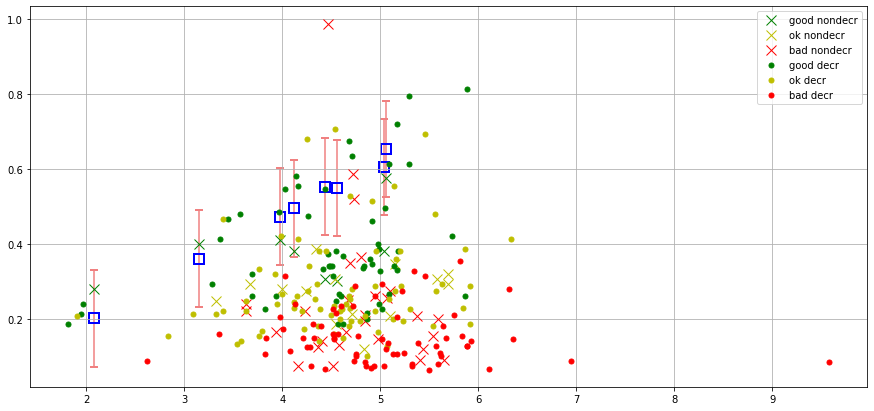

In [20]:
data = pd.read_csv("y2000thru2003.csv")
nond = pd.read_csv("nondecr.csv")

max_spread = 0.128645

plt.figure(figsize = (15, 7))
plt.plot(nond.L[nond.eye == 1], nond.per[nond.eye == 1], 'gx', label="good nondecr",markersize=10)
plt.plot(nond.L[nond.eye == 2], nond.per[nond.eye == 2], 'yx', label="ok nondecr",markersize=10)
plt.plot(nond.L[nond.eye == 0], nond.per[nond.eye == 0], 'rx', label="bad nondecr",markersize=10)
# plt.plot(nond.L[nond.eye == 1], nond.tb[nond.eye == 1], 'bs', label='TbT05 model', 
#          markerfacecolor='none', markersize=10)

plt.errorbar(nond.L[nond.eye==1], nond.tb[nond.eye==1], yerr=max_spread, fmt='s', 
             markerfacecolor='none', capsize=4, markeredgecolor='blue',
             zorder=0, markersize=10, color='lightcoral', markeredgewidth=2)

plt.plot(data.L[data.eye == 1], data.per[data.eye == 1], 'g.', label="good decr",markersize=10)
plt.plot(data.L[data.eye == 2], data.per[data.eye == 2], 'y.', label="ok decr",markersize=10)
plt.plot(data.L[data.eye == 0], data.per[data.eye == 0], 'r.', label="bad decr",markersize=10)

plt.grid()
plt.legend()

<ipython-input-123-03fbf734fd5b>:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


(array([-100.,  -75.,  -50.,  -25.,    0.,   25.,   50.,   75.,  100.]),
 [Text(0, -100.0, '−100'),
  Text(0, -75.0, '−75'),
  Text(0, -50.0, '−50'),
  Text(0, -25.0, '−25'),
  Text(0, 0.0, '0'),
  Text(0, 25.0, '25'),
  Text(0, 50.0, '50'),
  Text(0, 75.0, '75'),
  Text(0, 100.0, '100')])

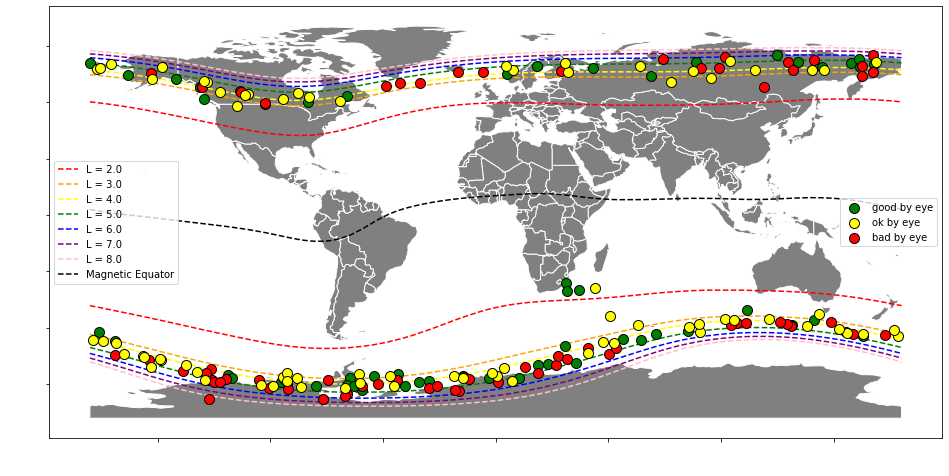

In [123]:
'''
Geographical location
'''

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

lgrid = pd.read_csv('Lgrid.dat', delimiter='\t', header=None)
data = pd.read_csv("events_runonapr29.csv")

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(16, 9))
world.plot(ax=ax, color='gray', edgecolor='white')

def name_line(col_num):
    if col_num < 15:
        nm = "L = " + str(col_num)
    elif col_num == 30:
        nm = "Magnetic Equator"
    return nm

col_list = ["red", "orange", "yellow", "green", "blue", "purple", "pink", "black"]
for i in np.arange(1, 30, 2):
    min_pos = np.argmin(lgrid.iloc[:,i])
    lat = np.concatenate(([lgrid.iloc[min_pos:,i-1], lgrid.iloc[:min_pos,i-1]]))
    lon = np.concatenate(([lgrid.iloc[min_pos:,i], lgrid.iloc[:min_pos,i]]))
    if i < 15:
        col_idx = int((i - 1)/2)
        ln_name = name_line((i+3)/2)
    elif (i >= 15) & (i < 28):
        col_idx = int((i - 15)/2)
        ln_name = None
    else:
        col_idx = len(col_list)-1
        ln_name = "Magnetic Equator"
    ax.plot(lon, lat, '--', color=col_list[col_idx], label=ln_name, zorder=5)
fleg = ax.legend(loc="center left")
ax.add_artist(fleg)

events = ax.scatter(data.lon[data.eye==1], data.lat[data.eye==1], s=100, c='green',
                      label='good by eye', zorder=50, edgecolor='black')
eventsb = ax.scatter(data.lon[data.eye==0], data.lat[data.eye==0], s=100, c='red',
                      label='bad by eye', zorder=50, edgecolor='black')
eventso = ax.scatter(data.lon[data.eye==2], data.lat[data.eye==2], s=100, c='yellow',
                      label='ok by eye', zorder=50, edgecolor='black')
ax.legend(handles=[events, eventso, eventsb], loc='right')

plt.xlabel("Longitude", color="white")
plt.ylabel("Latitude", color="white")
plt.xticks(color='white')
plt.yticks(color='white')

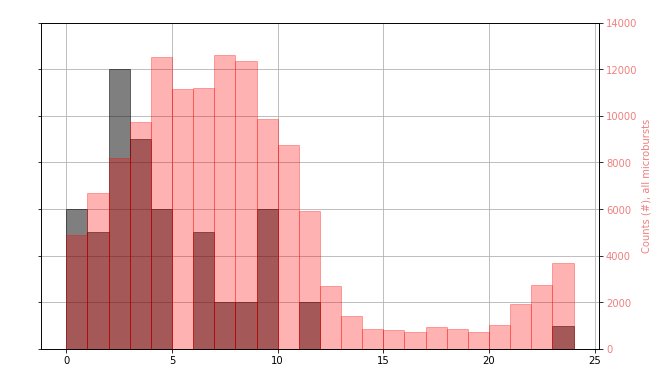

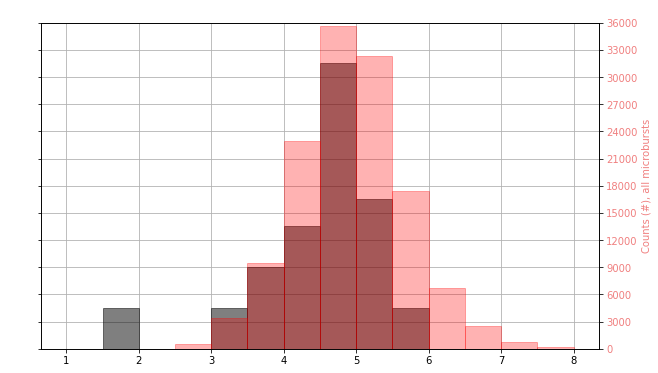

In [161]:
'''
Histograms (swirly eye emoji)
'''

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# read in data
data = pd.read_csv("y2000thru2003.csv")
ref = pd.read_csv("microburst_catalog_00.txt", sep=",")

# limit reference data to time surveyed by my search script
time_needed = pd.to_datetime(ref['dateTime'])
idx = np.where((time_needed >= datetime(2000, 1, 1)) & (time_needed <= datetime(2003, 12, 31)))[0]
ref = ref.iloc[idx,:]

# plot in MLT
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx() 
ax2.hist(ref.MLT, bins=24, range=(0,24), label='all microbursts', alpha=0.3, 
         facecolor='red', edgecolor='red', zorder=20)
ax1.hist(data.MLT[data.eye == 1], bins=24, range=(0,24), label='good bouncing packets', alpha=0.5, 
         facecolor='black', edgecolor='black', zorder=50)

ax2.tick_params(axis='y', labelcolor="lightcoral")
ax2.set_title('MLT (microburst catalog vs. my bouncing packets)', color="white")
ax2.set_xlabel('MLT', color="white")
ax2.set_ylabel('Counts (#), all microbursts', color="lightcoral")
ax1.set_ylabel('Counts (#), good bouncing packets', color="white")
ax1.grid()
ax2.tick_params(labelcolor="lightcoral")
ax1.tick_params(axis='y',labelcolor="white")
ax1.set_yticks(np.linspace(0, 14, 8))
ax2.set_yticks(np.linspace(0, 14000, 8))

### L-shell
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx() 
ax2.hist(ref.L_Shell, bins=14, range=(1,8), label='all microbursts', alpha=0.3, 
         facecolor='red', edgecolor='red', zorder=20)
ax1.hist(data.L[data.eye == 1], bins=14, range=(1,8), label='good bouncing packets', alpha=0.5, 
         facecolor='black', edgecolor='black', zorder=50)

ax2.tick_params(axis='y', labelcolor="lightcoral")
ax2.set_title('L-shell (microburst catalog vs. my bouncing packets)', color="white")
ax2.set_xlabel('L-shell', color="white")
ax2.set_ylabel('Counts (#), all microbursts', color="lightcoral")
ax1.set_ylabel('Counts (#), good bouncing packets', color="white")
ax1.set_yticks(np.linspace(0, 24, 13))
ax2.set_yticks(np.linspace(0, 36000, 13))
ax2.set_ylim((0, 36000))
ax1.grid()
ax2.tick_params(labelcolor="lightcoral")
ax1.tick_params(axis='y',labelcolor="white")


Text(0, 1.5707963267948966, 'MLT')

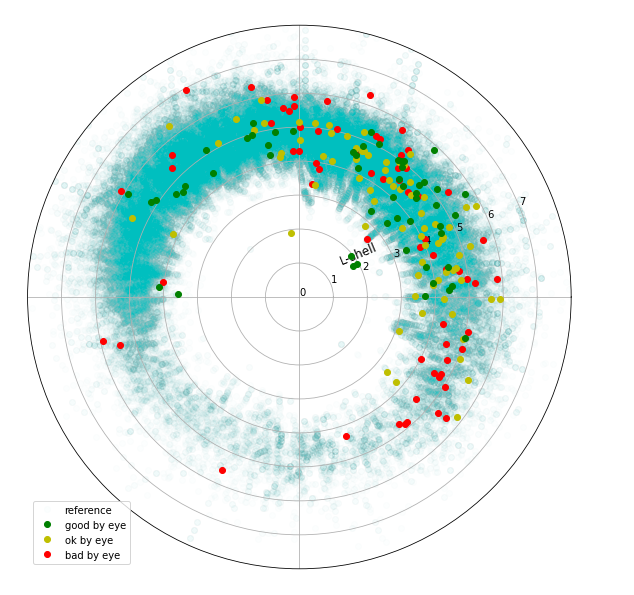

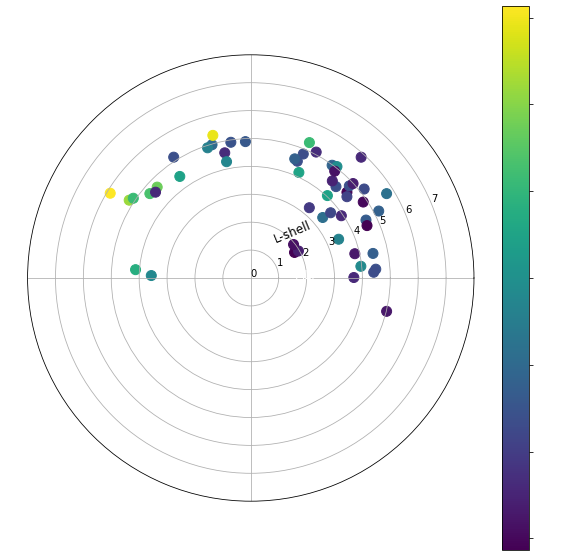

In [130]:
'''
Polar plot of MLT and L-shell
'''

# read in data
data = pd.read_csv("y2000thru2003.csv")
ref = pd.read_csv("microburst_catalog_00.txt", sep=",")

# limit reference data to time surveyed by my search script
time_needed = pd.to_datetime(ref['dateTime'])
idx = np.where((time_needed >= datetime(2000, 1, 1)) & (time_needed <= datetime(2003, 12, 31)))[0]
ref = ref.iloc[idx,:]

# Create the plot
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': 'polar'})
# Reference microburst data
ax.plot(ref.MLT*np.pi/12, ref.L_Shell, 'co', label='reference', alpha=0.01, zorder=0)
# Plot my events
ax.plot(data.MLT[data.eye==1]*np.pi/12, data.L[data.eye==1], 'go', label='good by eye', zorder=100)
ax.plot(data.MLT[data.eye==2]*np.pi/12, data.L[data.eye==2], 'yo', label='ok by eye', zorder=50)
ax.plot(data.MLT[data.eye==0]*np.pi/12, data.L[data.eye==0], 'ro', label='bad by eye', zorder=25)

# Random formatting stuff
ax.set_rmax(8)
ax.set_rticks(np.arange(0,8))  # L shell values
ticklocs = np.pi*np.arange(0, 360, 90)/180
ax.set_xticks(ticklocs.tolist())
ax.set_xticklabels(['0', '6', '12', '18'],color="white")
ax.set_theta_zero_location("E")
ax.grid(True)
ax.legend()
# labels (weird for polar plots lol)
plt.text(np.pi*2/9, 1.5, 'L-shell', rotation=22.5, size=12)
plt.text(0, 9, 'MLT', color="white", size=12)


# Only good events, and use bounce period as colorbar
fig2, ax2 = plt.subplots(figsize=(10,10), subplot_kw={'projection': 'polar'})
# Reference microburst data
pp = ax2.scatter(data.MLT[data.eye==1]*np.pi/12, data.L[data.eye==1], s=100, c=data.per[data.eye==1])
cbar = fig2.colorbar(pp)
cbar.set_label('bounce period (s)', color="white")
cbar.ax.tick_params(labelcolor="white")

# Random formatting stuff
ax2.set_rmax(8)
ax2.set_rticks(np.arange(0,8))  # L shell values
ticklocs = np.pi*np.arange(0, 360, 90)/180
ax2.set_xticks(ticklocs.tolist())
ax2.set_xticklabels(['0', '6', '12', '18'],color="white")
ax2.set_theta_zero_location("E")
ax2.grid(True)
ax2.set_title('good ones only',color="white")
plt.text(np.pi/3, 1.5, 'L-shell', rotation=22.5, size=12)
plt.text(0, np.pi/2, 'MLT', color="white", size=12)

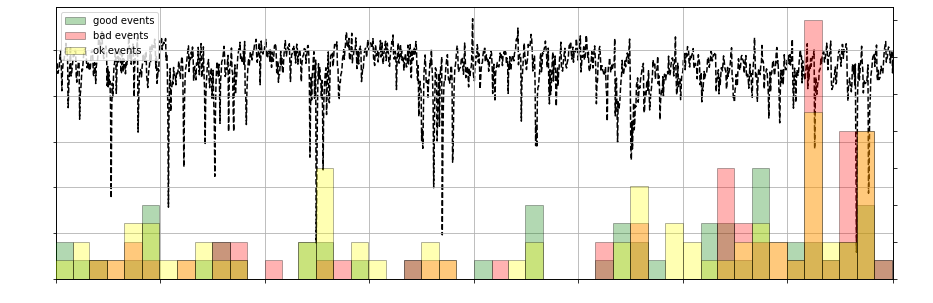

In [129]:
'''
Dst and events
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

data = pd.read_csv("events_runonapr29.csv")
omni = pd.read_csv("OMNI2_H0_MRG1HR_7715.csv", header=72)
t = pd.to_datetime(data.t, format='%Y-%m-%d %H:%M:%S.%f')

dstt = pd.to_datetime(omni.iloc[:,0], format='%Y-%m-%dT%H:%M:%S.%fZ')
dst = omni.iloc[:,1]

omni['TIME'] = pd.to_datetime(omni['TIME'])
omni['DATE'] = omni['TIME'].dt.date
dailydst = omni.groupby('DATE')['DST_nT'].mean()

# Dst time series
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(np.unique(omni.DATE), dailydst, 'k--', zorder=0)
ax.set_ylabel('Dst index (nT)', color="white")
ax.grid()
ax.set_yticks(np.arange(-250, 50, 50))
ax.tick_params(axis='y', labelcolor='white')


# Histograms of events
xmin = datetime(1999, 12, 1)
xmax = datetime(2003, 12, 31)
bin_edges = date_range = pd.date_range(start=xmin, end=xmax, freq='M')
ax2 = ax.twinx()
ax2.hist(t[data.eye==1], bins=bin_edges, label='good events', alpha=0.3, 
         facecolor='green', edgecolor='black', zorder=10)
ax2.hist(t[data.eye==0], bins=bin_edges, range=(xmin, xmax), label='bad events', alpha=0.3, 
         facecolor='red', edgecolor='black', zorder=15)
ax2.hist(t[data.eye==2], bins=bin_edges, range=(xmin, xmax), label='ok events', alpha=0.3, 
         facecolor='yellow', edgecolor='black', zorder=20)
ax2.set_ylabel('Number of Events', color="white")
ax2.set_xlim(datetime(2000,1,1), datetime(2004,1,1))
ax2.legend().set_zorder(100)
ax.tick_params(labelcolor="white")
ax2.tick_params(labelcolor="white")
